In [1]:
import pyvista as pv
import numpy as np
from pathlib import Path

In [2]:
file = Path('blood/centerlines.vtp')
cl = pv.read(file)

In [3]:
cl.n_cells, cl.n_lines, cl.n_arrays, cl.n_points

(6, 6, 1, 701)

In [4]:
cl2 = cl.compute_arc_length()
cl2['arc_length'].shape

(701,)

In [5]:
cl.head()

'PolyData (0x7f6cc0360640)\n  N Cells:\t6\n  N Points:\t701\n  X Bounds:\t-4.257e+01, 2.567e+01\n  Y Bounds:\t-1.400e+00, 4.615e+01\n  Z Bounds:\t-1.812e+01, 9.256e+01\n  N Arrays:\t1\n'

In [6]:
npoints = [cl.cell_n_points(i) for i in range(cl.n_cells)]
start = np.cumsum([0]+npoints)
lines = [np.arange(start[i],start[i+1]) for i in range(len(start)-1)]
cl.compute_arc_length()
cl.cell_data

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : None
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays : None

In [7]:
cl2 = cl.extract_cells(5)
cl2[cl2.array_names[1]]

array([574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586,
       587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599,
       600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612,
       613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625,
       626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638,
       639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651,
       652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664,
       665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677,
       678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690,
       691, 692, 693, 694, 695, 696, 697, 698, 699, 700])

In [8]:
lines = [pv.PolyData(cl.cell_points(i))  for i in range(cl.n_cells)]
#length = [l['arc_length'] for l in lines]

In [9]:
lines[0]

PolyData,Information
N Cells,89
N Points,89
X Bounds,"-2.838e+01, -1.971e+01"
Y Bounds,"2.862e+01, 3.915e+01"
Z Bounds,"-1.812e+01, 5.463e+01"
N Arrays,0


In [10]:
A = np.arange(12).reshape(2,6)

In [11]:
A[0,:]

array([0, 1, 2, 3, 4, 5])

In [12]:
%run PythonScripts/distance_map.py blood/mesh/fontan_stor_v5_L1_bl050_sl3.vtu blood/centerlines.vtp 0.5 2

[155 118 240]
  Saved blood/mesh/distance_map.vtk


In [13]:
nproc = 10
proc_size = np.ceil(tube.size/nproc)

In [14]:
mask = slice<10
print(np.sum(slice<10))
print(tube[mask].min(), tube[mask].max())

16830
2 2


In [15]:
mask = slice<1
tube

array([2, 2, 2, ..., 3, 3, 3])

In [17]:
slice

array([  0,   0,   0, ..., 178, 178, 178])

In [23]:
proc = -1*ones(ugrid.n_cells, dtype=int)
stop = npmax(slice)
a = b = 0
p = 0
while b < stop:
    mask = (slice>=a)*(slice<=b)
    if np.sum(mask) >= proc_size:
        print(f'p: {p}, a,b: {a},{b}')
        a = b
        proc[mask] = p
        p += 1
    b += 1
ugrid['proc'] = proc
ugrid.save('processes.vtk')        

p: 0, a,b: 0,23
p: 1, a,b: 23,45
p: 2, a,b: 45,61
p: 3, a,b: 61,73
p: 4, a,b: 73,86
p: 5, a,b: 86,110
p: 6, a,b: 110,149
p: 7, a,b: 149,223
p: 8, a,b: 223,242
p: 9, a,b: 242,262


In [25]:
tgrid5 = ugrid.threshold(value=5, scalars='tube')

In [27]:
conn = tgrid5.connectivity()

In [34]:
bodies = conn.split_bodies()

In [42]:
vol = [bodies[k].volume for k in bodies.keys()]

In [56]:
body_list = [bodies[bodies.keys()[i]] for i in np.argsort(vol)]

In [59]:
tgrid1 = ugrid.threshold(value=1, scalars='tube')

In [61]:
t51 = tgrid5 + tgrid1

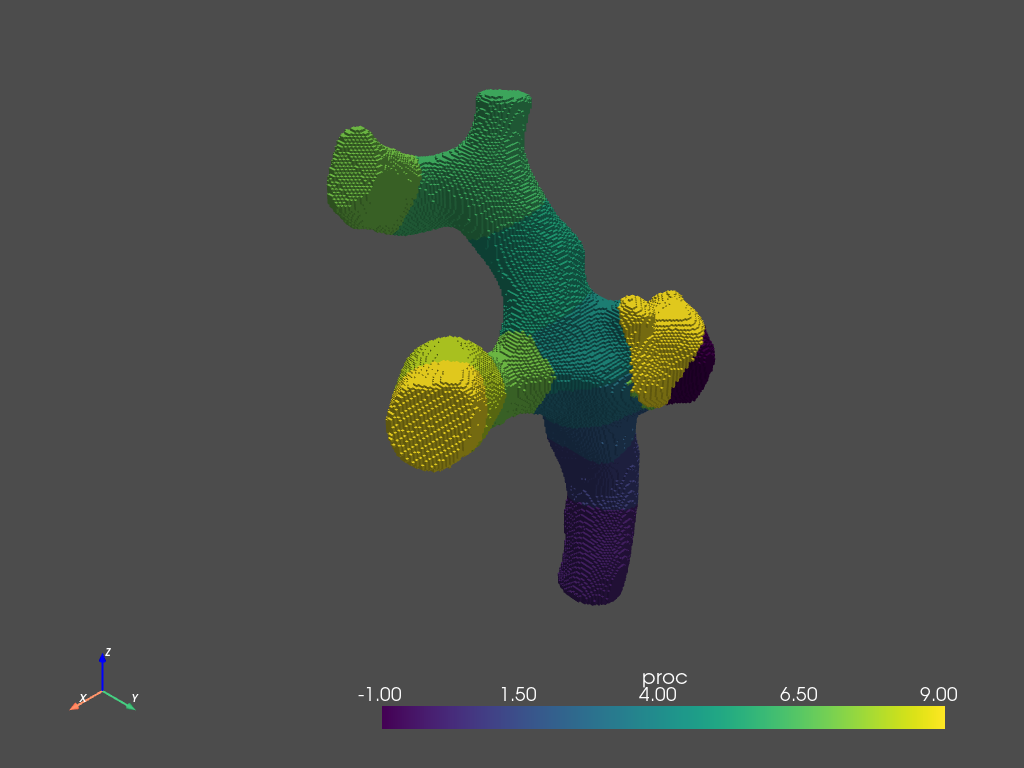

In [65]:
tgrid1.plot()